In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/bmi.csv")
df
#df.drop(columns = ["BmiClass"])

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,Overweight
737,44,1.91,106.90,29.302925,Overweight
738,25,1.82,88.40,26.687598,Overweight
739,35,1.88,98.50,27.868945,Overweight


**Scatter Plot**

Text(0.5, 1.0, 'Scatter plot of HEIGHT vs WEIGHT')

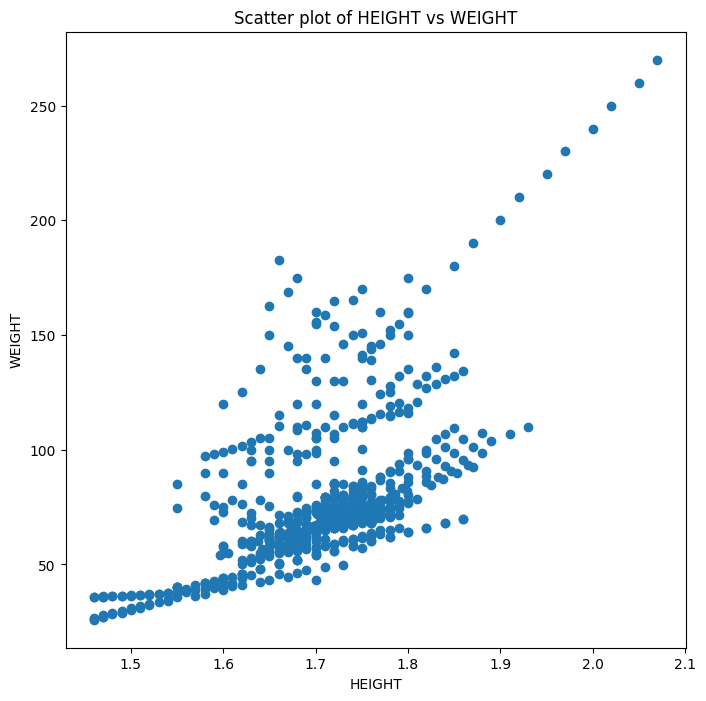

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df['Height'], df['Weight'])
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")
plt.title("Scatter plot of HEIGHT vs WEIGHT")

In [ ]:
df["Height"].corr(df["Weight"])

0.6076716078109788

**Box Plot**

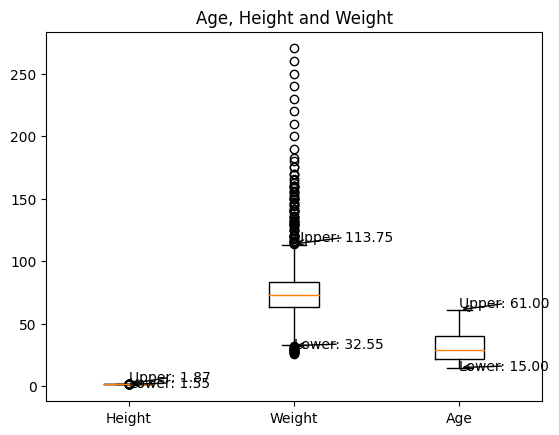

In [ ]:
data = [df["Height"], df["Weight"],df["Age"]]

fig2, ax2 = plt.subplots()
ax2.set_title('Age, Height and Weight')
boxplot = ax2.boxplot(data,labels=["Height","Weight","Age"])

for i in range(len(data)):
    current_data = data[i]

    q1 = current_data.quantile(0.25)
    q3 = current_data.quantile(0.75)
    iqr = q3 - q1

    lower_whisker = max(current_data.min(), q1 - 1.5 * iqr)
    upper_whisker = min(current_data.max(), q3 + 1.5 * iqr)

    ax2.annotate(f'Lower: {lower_whisker:.2f}', xy=(i + 1, lower_whisker),
                  xytext=(i + 1, lower_whisker - 2),
                  arrowprops=dict(arrowstyle='->'))
    ax2.annotate(f'Upper: {upper_whisker:.2f}', xy=(i + 1, upper_whisker),
                  xytext=(i + 1, upper_whisker + 2),
                  arrowprops=dict(arrowstyle='->'))

plt.show()

**Standraised coordinates**

In [ ]:
df['Height_z'] = (df['Height'] - df['Height'].mean()) / df['Height'].std()
df['Weight_z'] = (df['Weight'] - df['Weight'].mean()) / df['Weight'].std()
df['Age_z'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

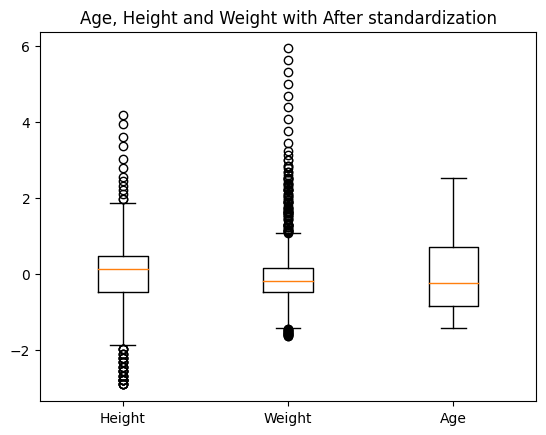

In [ ]:
data = [df["Height_z"], df["Weight_z"],df["Age_z"]]

fig2, ax2 = plt.subplots()
ax2.set_title('Age, Height and Weight with After standardization')
ax2.boxplot(data,labels=["Height","Weight","Age"])

plt.show()

**Removing Outliers**

In [ ]:
df_clean = df[(df["Weight"] < 115) & (df["Weight"] > 32)]
df_clean

df_clean = df_clean[(df["Height"] < 1.88) & (df["Height"] > 1.54)]
df_clean

<ipython-input-10-1a9b1343b6d1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df["Height"] < 1.88) & (df["Height"] > 1.54)]


,Age,Height,Weight,Bmi,BmiClass,Height_z,Weight_z,Age_z
0,61,1.85,109.30,31.935720,Obese Class 1,1.635053,0.957617,2.520870
1,60,1.71,79.02,27.023700,Overweight,0.006662,0.018835,2.435073
2,60,1.55,74.70,31.092612,Obese Class 1,-1.854356,-0.115100,2.435073
4,60,1.58,97.10,38.896010,Obese Class 2,-1.505416,0.579376,2.435073
5,59,1.71,79.32,27.126295,Overweight,0.006662,0.028136,2.349277
...,...,...,...,...,...,...,...,...
732,23,1.78,83.30,26.290872,Overweight,0.820857,0.151529,-0.739403
733,33,1.84,93.10,27.498819,Overweight,1.518739,0.455362,0.118564
735,24,1.80,85.80,26.481481,Overweight,1.053484,0.229038,-0.653606
736,34,1.86,95.70,27.662157,Overweight,1.751366,0.535971,0.204360


Text(0.5, 1.0, 'Scatter plot of HEIGHT vs WEIGHT after Standardization')

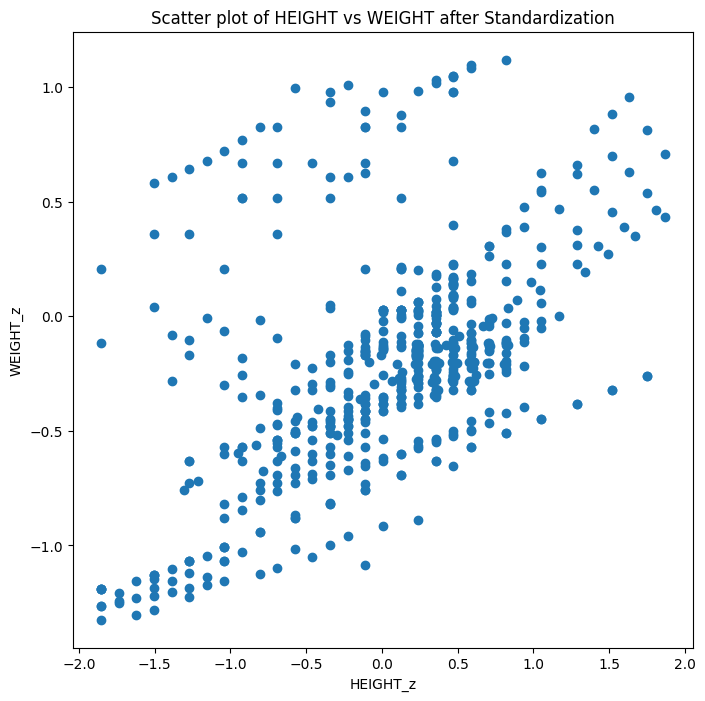

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df_clean['Height_z'], df_clean['Weight_z'])
plt.xlabel("HEIGHT_z")
plt.ylabel("WEIGHT_z")
plt.title("Scatter plot of HEIGHT vs WEIGHT after Standardization")

In [ ]:
df_clean["Height"].corr(df_clean["Weight"])

0.5111477495314264

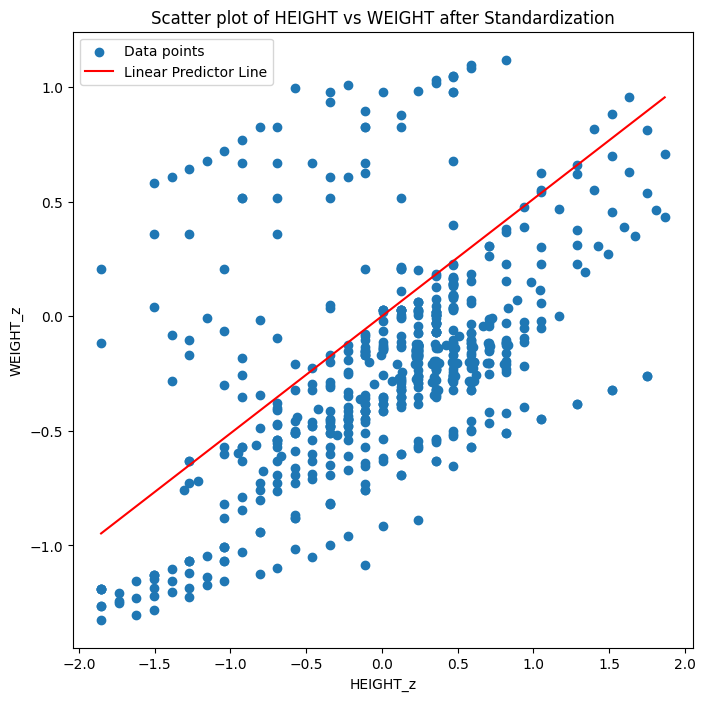

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r = df_clean["Height"].corr(df_clean["Weight"])

plt.figure(figsize=(8, 8))
plt.scatter(df_clean['Height_z'], df_clean['Weight_z'], label='Data points')

x_values = np.linspace(df_clean['Height_z'].min(), df_clean['Height_z'].max(), 100)
#linear predictor y = ax + b
y_values = r * x_values
plt.plot(x_values, y_values, color='red', label='Linear Predictor Line')

plt.xlabel("HEIGHT_z")
plt.ylabel("WEIGHT_z")
plt.title("Scatter plot of HEIGHT vs WEIGHT after Standardization")
plt.legend()

plt.show()

**Class Activity**

Text(0.5, 1.0, 'Scatter plot of Height vs Weight')

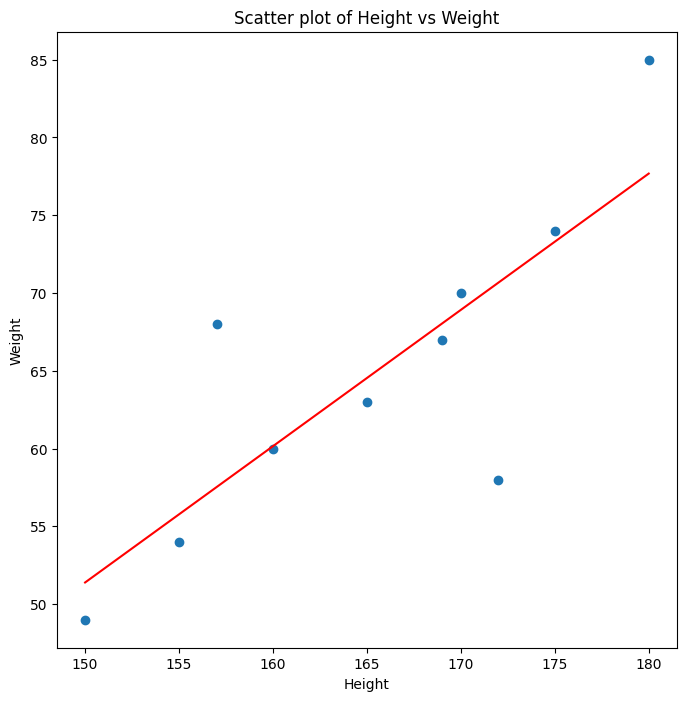

In [ ]:
data = {
    "height" : [150, 155, 160, 165, 170, 157, 172, 180, 175, 169],
    "weight": [49, 54, 60, 63, 70, 68, 58, 85, 74, 67]
}


data = pd.DataFrame(data)
data['height_z'] = (data['height'] - data['height'].mean()) / data['height'].std()
data['weight_z'] = (data['weight'] - data['weight'].mean()) / data['weight'].std()

r = data["height"].corr(data["weight"])
mean_of_weight = data["weight"].mean()
std_of_weight = data["weight"].std()
mean_of_height = data["height"].mean()
std_of_height = data["height"].std()

plt.figure(figsize=(8,8))
plt.scatter(data['height'], data['weight'])

x_values = np.linspace(data['height_z'].min(), data['height_z'].max(), 100)
#linear predictor y = ax + b
y_values = std_of_weight * r * x_values + mean_of_weight
x_values = std_of_height * x_values + mean_of_height
plt.plot(x_values, y_values, color='red', label='Linear Predictor Line')


plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter plot of Height vs Weight")

In [ ]:
print(r)

0.8081009161331261
